# **HySOM** Visualization functions
This tutorial will demonstrate the use of some visualization function incorporated in HySOM for rapid exploration of the map, and visual analysis of hysteresis loops data

To demonstrate its functionality, we will use the **General T-Q SOM** and a sample dataset included with **HySOM**. 


In [14]:
import numpy as np
from hysom.pretrainedSOM import get_generalTQSOM
from hysom.utils.plots import plot_map, heat_map, heatmap_frequency
from hysom.utils.datasets import get_sample_data


## Load the General T-Q SOM 

In [2]:
TQsom = get_generalTQSOM()

## Plot the SOM

This can be done using the `plot_map` function from the `hysom.utils.plots`. `plot_map` receives as inputs the SOM's prototypes and returns an array of matplotlib axes:  

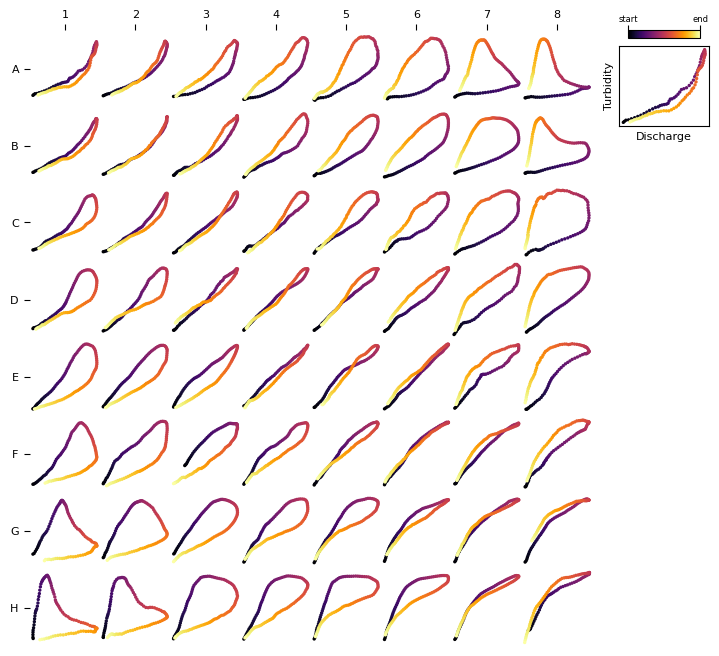

In [3]:
prototypes = TQsom.get_prototypes()
axs = plot_map(prototypes)

## Visualize frequency distributions

### Get some data


In [11]:
data = get_sample_data()[:81]

We can leverage the `plot_som` function to visualize this dataset as all it requires is two dimensional array of loops.  
Note that `data` is currently a one-dimensional vector of 81 loops (`get_sample_data()[:81]` extracts the first 81 samples from data).  
  
Let's make it a 2D array of $9\times9$ and plot it using `plot_som`, we'll also change the colormap used to represent the time direction in the loop: 

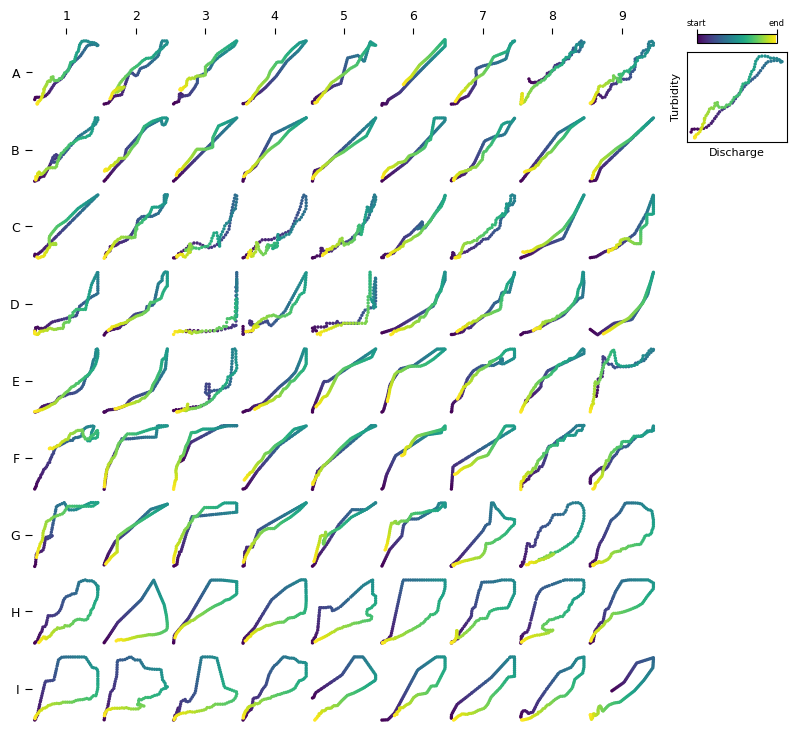

In [12]:
data2d = data.reshape(9,9,100,2)
axs = plot_map(data2d, loop_cmap='viridis')

This dataset is comprised mainly of single-line and clockwise loops.  

To visualize the frequency distribution using the General T-Q SOM (or any trained SOM), we can use the `heatmap_frequency` function from the `hysom.utils.plots` module.  

`heatmap_frequency` requires a trained `HSOM` and a **1D vector** of data samples (so we'll use `data` instead of `data2d`)  


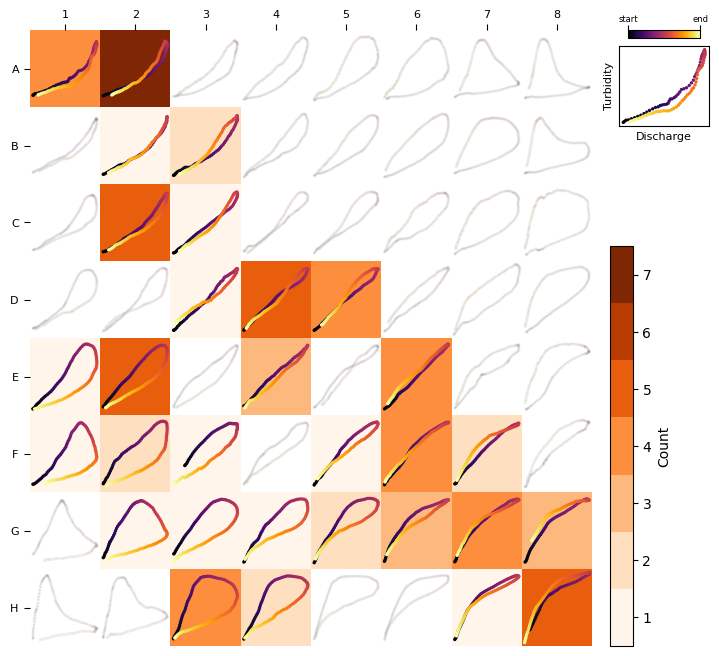

In [13]:
heatmap_frequency(TQsom, data)

## Heat maps for any variable
A heat map can be generated to visualize the distribution of any variable across loop types, helping to identify associations between loop types and hydrologic factors.  
For example, consider the question: *Which loop types are associated with higher sediment load?* To answer this, we need a dataset that provides sediment load values for each loop sample in our dataset and then plot the distribution of values over the SOM.  

To illustrate this concept, we’ll create a synthetic dataset.


In [26]:
synthetic_load = np.linspace(0, 100, len(data))
synthetic_load

array([  0.  ,   1.25,   2.5 ,   3.75,   5.  ,   6.25,   7.5 ,   8.75,
        10.  ,  11.25,  12.5 ,  13.75,  15.  ,  16.25,  17.5 ,  18.75,
        20.  ,  21.25,  22.5 ,  23.75,  25.  ,  26.25,  27.5 ,  28.75,
        30.  ,  31.25,  32.5 ,  33.75,  35.  ,  36.25,  37.5 ,  38.75,
        40.  ,  41.25,  42.5 ,  43.75,  45.  ,  46.25,  47.5 ,  48.75,
        50.  ,  51.25,  52.5 ,  53.75,  55.  ,  56.25,  57.5 ,  58.75,
        60.  ,  61.25,  62.5 ,  63.75,  65.  ,  66.25,  67.5 ,  68.75,
        70.  ,  71.25,  72.5 ,  73.75,  75.  ,  76.25,  77.5 ,  78.75,
        80.  ,  81.25,  82.5 ,  83.75,  85.  ,  86.25,  87.5 ,  88.75,
        90.  ,  91.25,  92.5 ,  93.75,  95.  ,  96.25,  97.5 ,  98.75,
       100.  ])

Now, we can use the `heat_map` function to see the distribution of values across loop types.  
`heat_map` requires a trained `HSOM`, a 1D vector of loops (`data`) and a 1D vector of corresponding values `synthetic_load` 

Note how, in the heat map below, clockwise loops are associated with higher color intensities. This pattern aligns with our synthetic_load, where values progressively increase, linking higher values to loops appearing toward the end of our dataset.

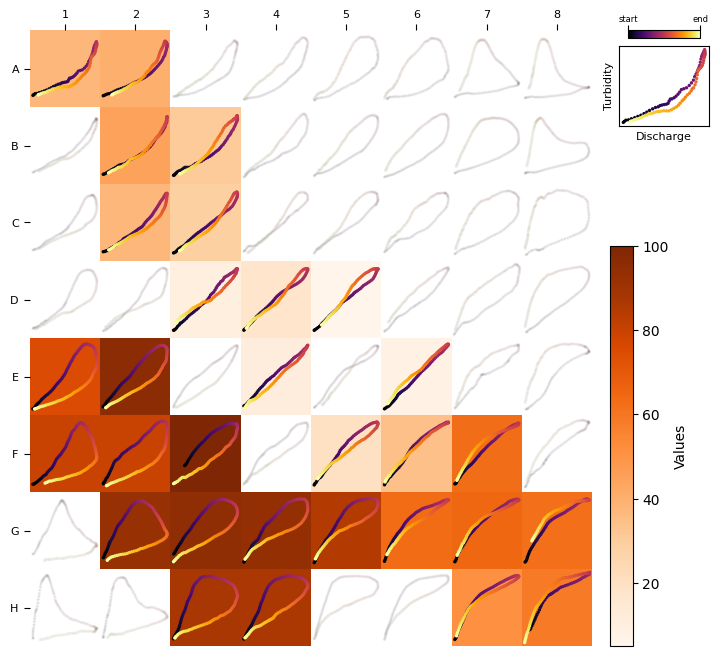

In [25]:
heat_map(TQsom, data, synthetic_load)